In [4]:
from google.colab import files
uploaded = files.upload()   # Choose "College_Event_Feedback.csv" when prompted

import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['College_Event_Feedback.csv']))

print("First 5 Rows of Data:")
print(df.head())


Saving College_Event_Feedback.csv to College_Event_Feedback.csv
First 5 Rows of Data:
           Event  Rating                                 Feedback
0      Tech Talk       4         It was informative and engaging.
1       Workshop       3        A bit too fast, but overall okay.
2  Cultural Fest       5     Had a lot of fun! Best event so far.
3        Seminar       2          Very boring and hard to follow.
4       Workshop       4  Great experience, hands-on and helpful.



📌 Rating Statistics:
count    10.000000
mean      3.600000
std       1.349897
min       1.000000
25%       3.000000
50%       4.000000
75%       4.750000
max       5.000000
Name: Rating, dtype: float64


/tmp/ipython-input-3222856348.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette="viridis")


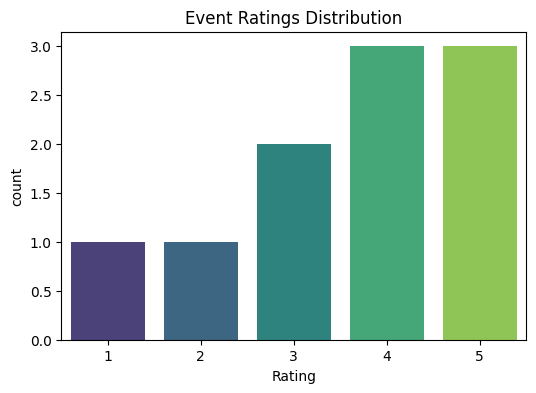

/tmp/ipython-input-3222856348.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette="pastel")


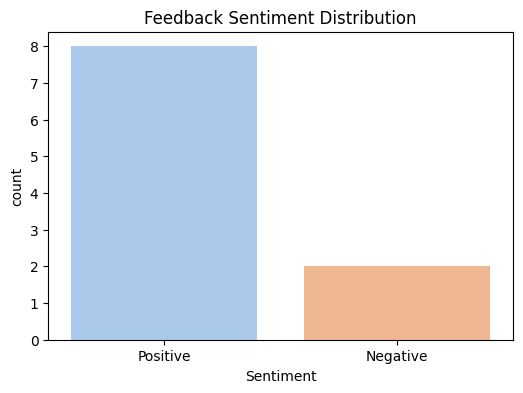

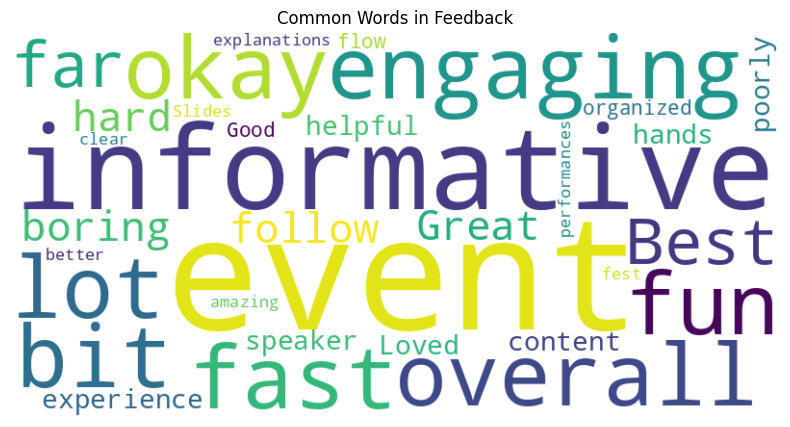


🔍 Insights:
✅ Average Rating: 3.6
✅ Most Common Sentiment: Positive
✅ Positive Feedback %: 80.0
✅ Negative Feedback %: 20.0


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud

# --------------------------
# Ratings Distribution
# --------------------------
print("\n📌 Rating Statistics:")
print(df['Rating'].describe())

plt.figure(figsize=(6,4))
sns.countplot(x='Rating', data=df, palette="viridis")
plt.title("Event Ratings Distribution")
plt.show()

# --------------------------
# Sentiment Analysis
# --------------------------
def get_sentiment(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Negative"

df['Sentiment'] = df['Feedback'].apply(get_sentiment)

plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df, palette="pastel")
plt.title("Feedback Sentiment Distribution")
plt.show()

# --------------------------
# Word Cloud
# --------------------------
text = " ".join(str(fb) for fb in df['Feedback'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Common Words in Feedback")
plt.show()

# --------------------------
# Insights
# --------------------------
print("\n🔍 Insights:")
print("✅ Average Rating:", round(df['Rating'].mean(),2))
print("✅ Most Common Sentiment:", df['Sentiment'].mode()[0])
print("✅ Positive Feedback %:", round((df['Sentiment'].value_counts()['Positive']/len(df))*100,2))
print("✅ Negative Feedback %:", round((df['Sentiment'].value_counts()['Negative']/len(df))*100,2))
